# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [26]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/boulaz2002/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [27]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")

In [28]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [100]:
# Fetch the Bitcoin news articles

bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size = 100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

Total articles about Bitcoin: 8062


In [101]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size= 100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

Total articles about Ethereum: 3235


In [102]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']

        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
    except AttributeError:
        pass

# Create DataFrame

bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937
1,2021-10-28,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904
2,2021-10-26,"For all the talk of democratizing finance, the...",0.0000,0.000,0.000,1.000
3,2021-11-12,"In keeping with a previous announcement, AMC t...",0.5719,0.153,0.000,0.847
4,2021-11-22,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -...",0.0000,0.000,0.000,1.000


In [103]:
# Create the Ethereum sentiment scores DataFrame

ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']

        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
    except AttributeError:
        pass

# Create DataFrame

ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-11-19,"If you claim ownership, someone will probably ...",0.7783,0.216,0.0,0.784
1,2021-11-12,"In keeping with a previous announcement, AMC t...",0.5719,0.153,0.0,0.847
2,2021-11-05,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.0,0.906
3,2021-11-01,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907
4,2021-11-01,Cryptocurrency and business continuity line im...,0.4588,0.097,0.0,0.903


In [104]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.114788,0.053280,0.026390,0.920310
std,0.346211,0.059171,0.048247,0.072839
min,-0.790600,0.000000,0.000000,0.696000
25%,0.000000,0.000000,0.000000,0.862500
50%,0.000000,0.054000,0.000000,0.926500
75%,0.381800,0.080250,0.042250,1.000000
max,0.822500,0.221000,0.229000,1.000000


In [105]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.202000,0.069570,0.022340,0.908090
std,0.362354,0.066752,0.049322,0.079068
min,-0.831600,0.000000,0.000000,0.660000
25%,0.000000,0.000000,0.000000,0.850750
50%,0.158550,0.067000,0.000000,0.911500
75%,0.498075,0.112000,0.000000,1.000000
max,0.822500,0.233000,0.218000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: **Ethereum had the highest mean positive score** (0.069570 for ETH and 0.053280 for BTC)

Q: Which coin had the highest compound score?

A: **Ethereum and Bitcoin had the same highest compound score** (0.822500)

Q. Which coin had the highest positive score?

A: **Ethereum had the highest positive score** (0.233000 for ETH and 0.221000 for BTC)

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [106]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/boulaz2002/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [107]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop_words = stopwords.words('english')
SW = set(stop_words)

# Expand the default stopwords list if necessary
# YOUR CODE HERE!


In [108]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lemmatizer = WordNetLemmatizer() 
    words = [lemmatizer.lemmatize(word) for word in words]

    # Convert the words to lowercase
    tokens = [t.lower() for t in words]
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    
    tokens = [word for word in tokens if word not in sw]

    return tokens

In [109]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = bitcoin_df.apply(lambda x : tokenizer(x['text']), axis=1)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937,"[similar, hoax, earlier, year, tied, walmart, ..."
1,2021-10-28,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904,"[theres, big, new, presence, slurping, power, ..."
2,2021-10-26,"For all the talk of democratizing finance, the...",0.0000,0.000,0.000,1.000,"[talk, democratizing, finance, vast, majority,..."
3,2021-11-12,"In keeping with a previous announcement, AMC t...",0.5719,0.153,0.000,0.847,"[keeping, previous, announcement, amc, theater..."
4,2021-11-22,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -...",0.0000,0.000,0.000,1.000,"[mizata, el, salvadorlondon, nov, reuters, el,..."


In [110]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df.apply(lambda x : tokenizer(x['text']), axis=1)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-11-19,"If you claim ownership, someone will probably ...",0.7783,0.216,0.0,0.784,"[claim, ownership, someone, probably, want, ta..."
1,2021-11-12,"In keeping with a previous announcement, AMC t...",0.5719,0.153,0.0,0.847,"[keeping, previous, announcement, amc, theater..."
2,2021-11-05,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.0,0.906,"[ethereum, bitcoin, two, biggest, cryptocurren..."
3,2021-11-01,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907,"[elon, muskpicture, alliance, getty, imagesa, ..."
4,2021-11-01,Cryptocurrency and business continuity line im...,0.4588,0.097,0.0,0.903,"[cryptocurrency, business, continuity, line, i..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [111]:
from collections import Counter
from nltk import ngrams

In [116]:
# Create a list of all sentence from DataFrame
def all_sentences(texts):
    texts_list = []
    for text in texts:
        texts_list.append(text)
    return texts_list

# Generate DataFrame of top 15 bigram

def bigram_count (texts_list):
    #combine all sentence into one large string
    big_string = ' '.join(texts_list)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_15 = dict(Counter(bigrams).most_common(15))
    df = pd.DataFrame(list(top_15.items()), columns=['Bigram', 'Count'])
    return df

In [117]:
# Generate the Bitcoin N-grams where N=2
bit_all_sent = all_sentences(bitcoin_df['text'])
bit_df = bigram_count(bit_all_sent)
bit_df


,Bigram,Count
0,"(new, york)",11
1,"(nov, reuters)",10
2,"(char, bitcoin)",10
3,"(reuters, bitcoin)",8
4,"(char, reuters)",8
5,"(illustration, taken)",7
6,"(picture, illustration)",6
7,"(bitcoin, fell)",5
8,"(oct, reuters)",5
9,"(bitcoin, mining)",4


In [118]:
# Generate the Ethereum N-grams where N=2
eth_all_sent = all_sentences(ethereum_df['text'])
eth_df = bigram_count(eth_all_sent)
eth_df


,Bigram,Count
0,"(nov, reuters)",8
1,"(new, york)",6
2,"(illustration, taken)",6
3,"(every, nft)",5
4,"(shiba, inu)",5
5,"(char, bitcoin)",4
6,"(taken, june)",4
7,"(char, new)",4
8,"(york, nov)",4
9,"(digital, asset)",4


In [119]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [121]:
# Use token_count to get the top 10 words for Bitcoin
big_string = ' '.join(bitcoin_df["text"])
processed = tokenizer(big_string)
token_count(processed, 10)

[('char', 96),
 ('bitcoin', 76),
 ('reuters', 32),
 ('cryptocurrency', 29),
 ('new', 19),
 ('said', 19),
 ('us', 17),
 ('crypto', 16),
 ('ha', 14),
 ('first', 14)]

In [122]:
# Use token_count to get the top 10 words for Ethereum
big_string = ' '.join(ethereum_df["text"])
processed = tokenizer(big_string)
token_count(processed, 10)

[('char', 99),
 ('bitcoin', 26),
 ('cryptocurrency', 26),
 ('ha', 21),
 ('ethereum', 21),
 ('new', 19),
 ('crypto', 17),
 ('reuters', 17),
 ('week', 13),
 ('market', 12)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [125]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [40.0, 20.0]

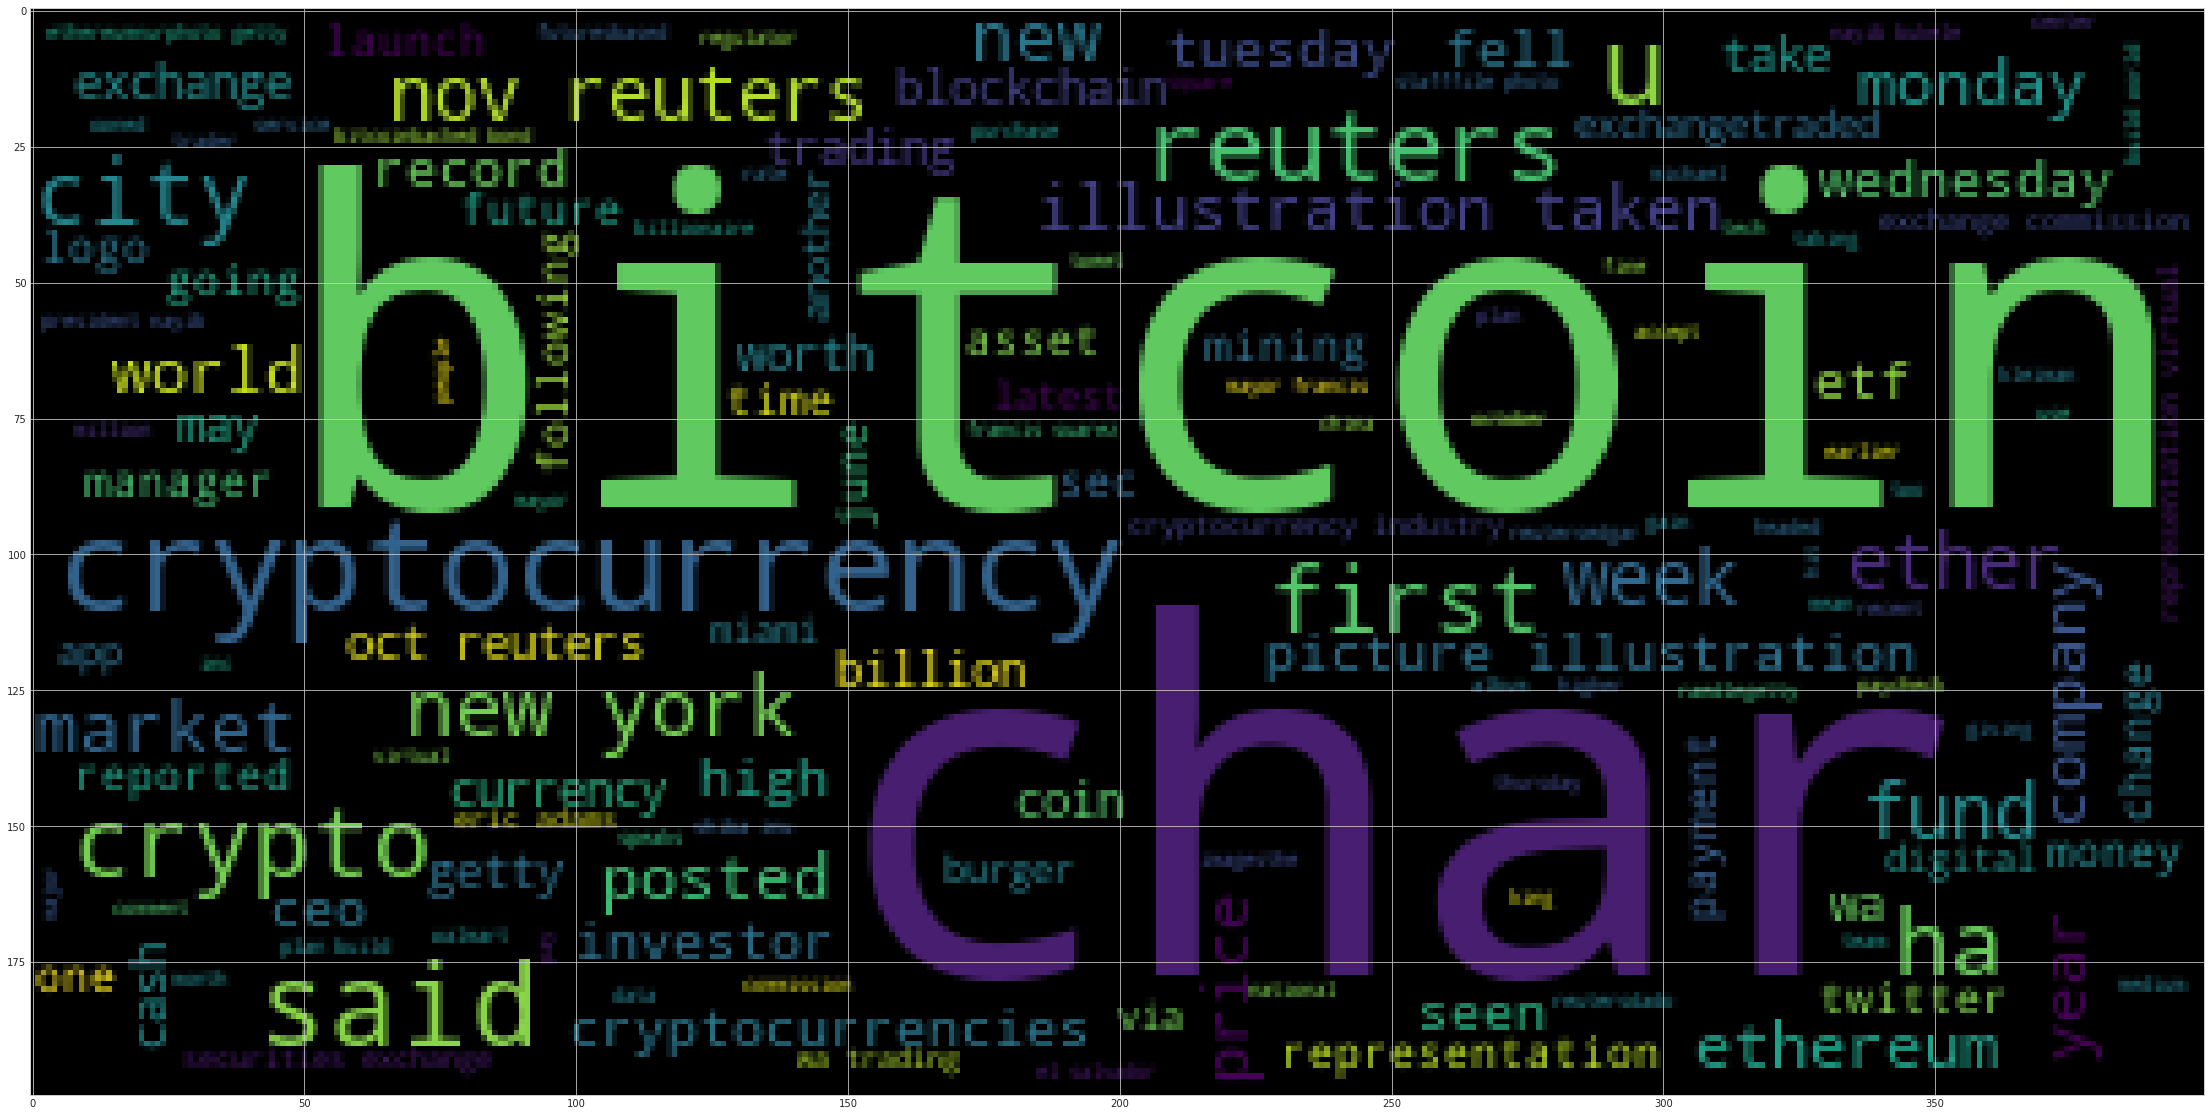

In [126]:
# Generate the Bitcoin word cloud
big_string = ' '.join(bitcoin_df['text'])
processed = tokenizer(big_string)
input_text = ' '.join(processed)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

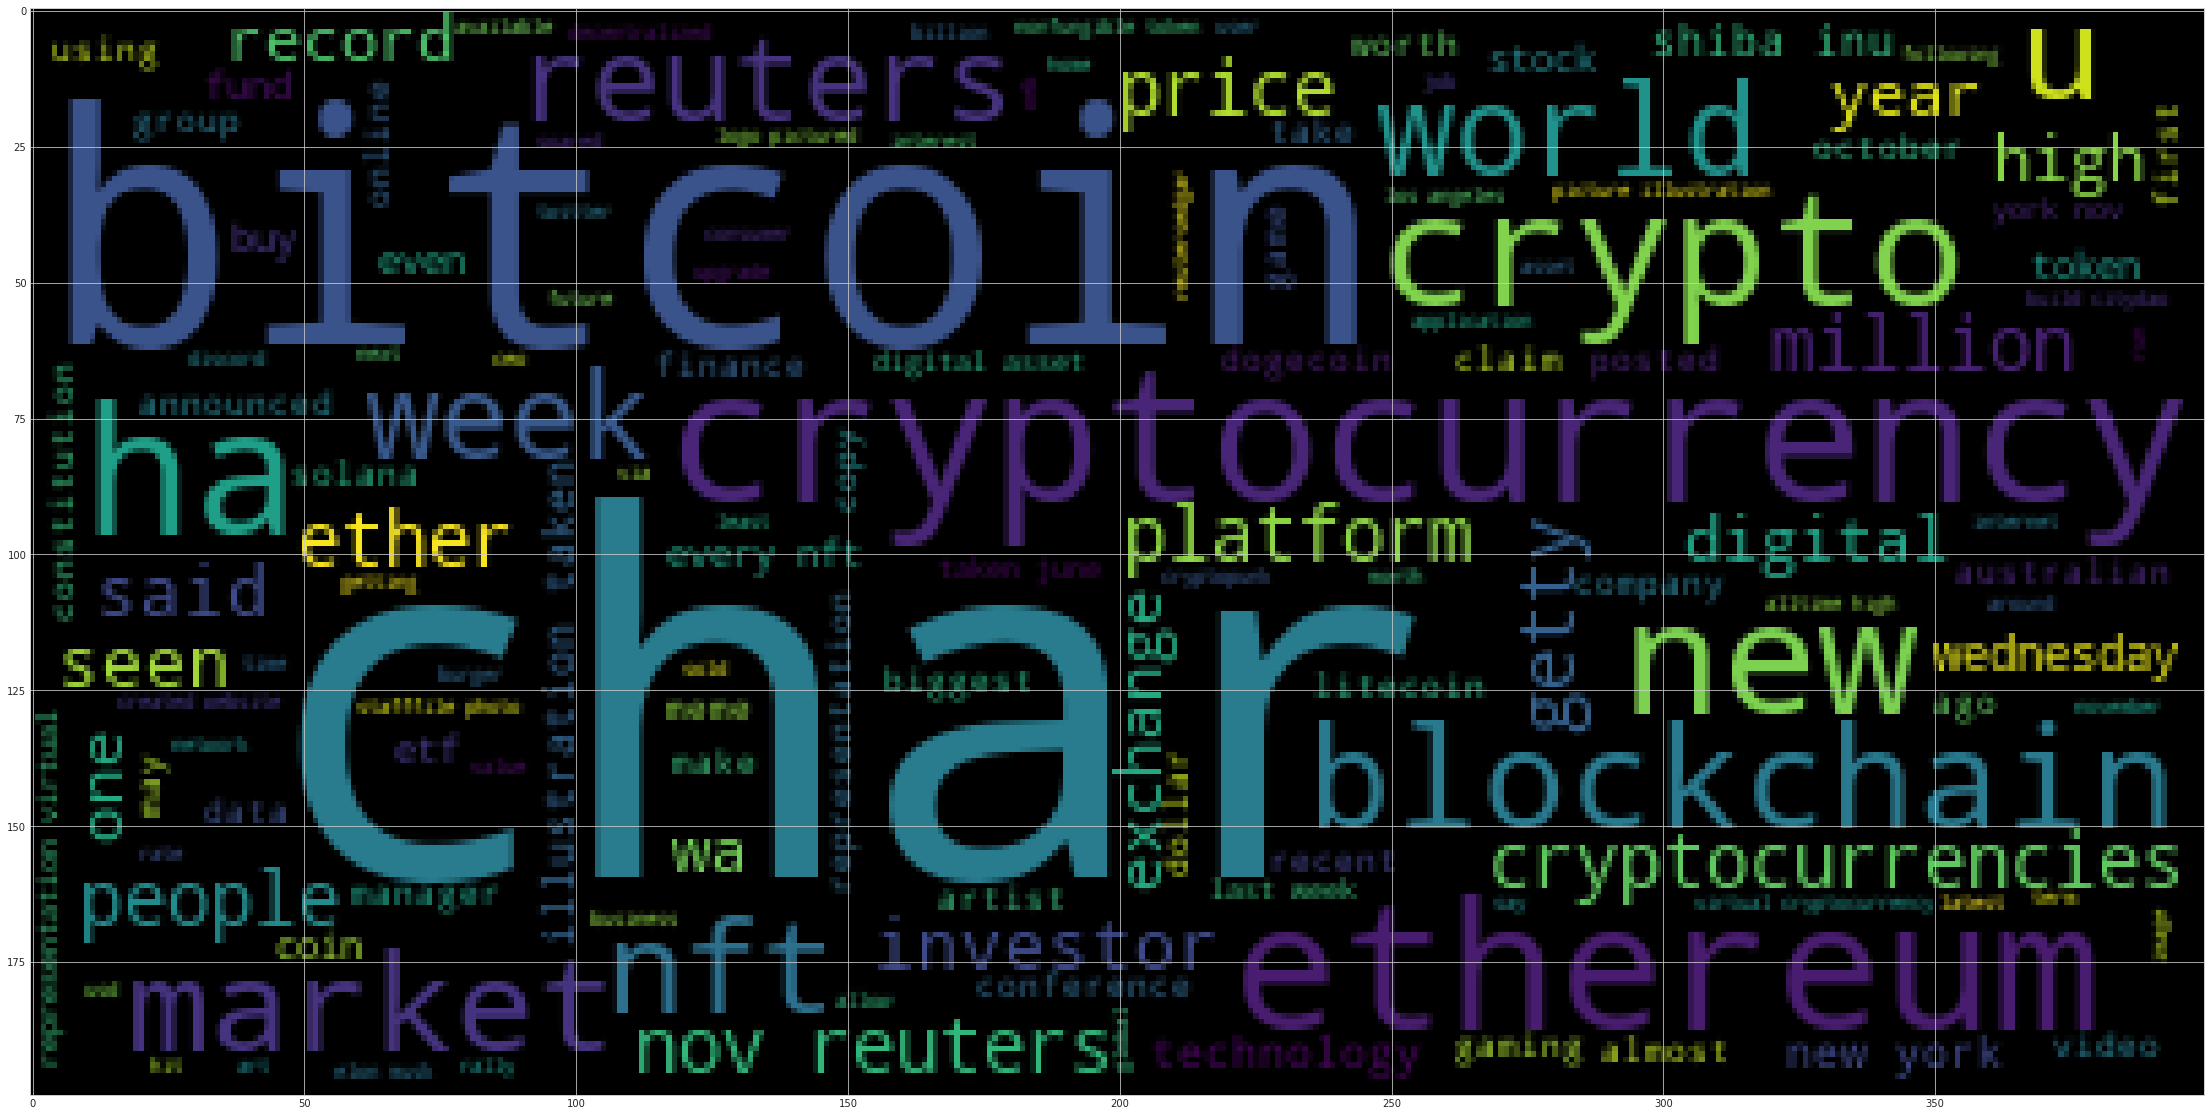

In [127]:
# Generate the Ethereum word cloud
big_string = ' '.join(ethereum_df['text'])
processed = tokenizer(big_string)
input_text = ' '.join(processed)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [71]:
import spacy
from spacy import displacy

2021-11-22 09:33:26.857228: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-22 09:33:26.857433: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [72]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [73]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [129]:
# Concatenate all of the Bitcoin text together

big_string_bitcoin = ' '.join(bitcoin_df['text'])
big_string_bitcoin

'A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nPhoto Illustration by Thiago Prudencio/S… [+1900 chars] Theres a big new presence slurping up power from the U.S. grid, and its growing: bitcoin miners. New research shows that the U.S. has overtaken China as the top global destination for bitcoin mining … [+3088 chars] For all the talk of democratizing finance, the vast majority of Bitcoin continues to be owned by a relative handful of investors.\r\nAs flagged by Bloomberg, newly released data by the National Bureau … [+4274 chars] In keeping with a previous announcement, AMC theaters now accept cryptocurrencies as payment for online purchases.\xa0\r\nBitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.\xa0\r\nPreviously, the compa… [+1036 chars] MIZATA, El Salvador/LONDON, Nov 22 (Reuters) - El Salvador plans to build the world\'s first "Bitcoin City" with money from

In [130]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(big_string_bitcoin)

# Add a title to the document

bitcoin_doc.user_data['title'] = 'Bitcoin Name Entity Recognition'


In [131]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [132]:
# List all Entities
for ent in bitcoin_doc.ents:
    print (ent.text, ent.label_)

earlier this year DATE
Verge ORG
Vox Media ORG
Thiago Prudencio/S PERSON
U.S. GPE
U.S. GPE
China GPE
Bitcoin ORG
Bloomberg ORG
the National Bureau ORG
AMC ORG
El Salvador GPE
LONDON GPE
Nov 22 DATE
Reuters ORG
El Salvador GPE
first ORDINAL
Bitcoin City WORK_OF_ART
$1 billion MONEY
Nayib Bukele PERSON
first ORDINAL
El Salvador GPE
first ORDINAL
Bitcoin City GPE
2021 DATE
Marco Bello PERSON
The Securities and Exchange Commission ORG
Valkyrie PERSON
NurPhoto ORG
ETF ORG
>Bloomberg PERSON
first ORDINAL
ETF ORG
7% PERCENT
Monday DATE
morning TIME
around $66,105 MONEY
3% PERCENT
4,722 MONEY
over 9% PERCENT
Spotify GPE
Adele PERSON
30 CARDINAL
Australian Baseball League ORG
Perth Heat ORG
first ORDINAL
Hea PERSON
68,000 MONEY
$5k
 MONEY
CoinGecko ORG
more than $3 trillion MONEY
May 20, 2021 DATE
REUTERS ORG
Dado Ruvic/File PhotoLONDON ORG
Nov 16 DATE
Reuters ORG
60 MONEY
Chinas PERSON
Tuesday DATE
Chinas National Development and Reform Commission ORG
Meng Wei PERSON
A decade ago DATE
just a f

---

### Ethereum NER

In [134]:
# Concatenate all of the Ethereum text together
big_string_eth = ' '.join(ethereum_df['text'])
big_string_eth

'If you claim ownership, someone will probably want to take it\r\nIn what may be one of the better pieces of performance art this year, Australian Geoffrey Huntley has created a website that promises to… [+4542 chars] In keeping with a previous announcement, AMC theaters now accept cryptocurrencies as payment for online purchases.\xa0\r\nBitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.\xa0\r\nPreviously, the compa… [+1036 chars] Ethereum and bitcoin are the two biggest cryptocurrencies.\r\nJordan Mansfield /Getty Images\r\nCrypto investors should be holding ethereum rather than bitcoin as interest rates rise, JPMorgan said, beca… [+2957 chars] Elon Musk\r\npicture alliance / Getty Images\r\nA cryptocurrency named after Elon Musk has shot to the moon with a 3,780% gain in October. \r\nDogelon Mars traded at $0.00000229 on November 1, up from $0.0… [+1533 chars] Cryptocurrency and business continuity line image for business concept.\r\nGetty Images\r\nLittle-known altcoin mana 

In [136]:
# Run the NER processor on all of the text
big_string_eth_doc = nlp(big_string_eth)

# Add a title to the document
big_string_eth_doc.user_data["title"] = 'Ethereum Name Entity Recognition'

In [137]:
# Render the visualization
displacy.render(big_string_eth_doc, style='ent')

In [138]:
# List all Entities
for ent in big_string_eth_doc.ents:
    print (ent.text, ent.label_)

this year DATE
Australian Geoffrey Huntley ORG
AMC ORG
two CARDINAL
Jordan Mansfield PERSON
JPMorgan ORG
Elon Musk PERSON
Getty Images ORG
Elon Musk PERSON
3,780% PERCENT
October DATE
Dogelon Mars PRODUCT
0.00000229 MONEY
November 1 DATE
0.0 MONEY
Getty Images ORG
the past week DATE
Apple ORG
Tim Cook PERSON
The New York Times' ORG
Tuesday DATE
1-2% PERCENT
NurPhoto PERSON
first ORDINAL
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/Illustration/File Photo MU ORG
almost 20 per cent MONEY
less than two weeks DATE
Burger King ORG
Robinhood GPE
Bitcoin , Ethereum and Dogecoin ORG
Royal Perks ORG
5 MONEY
Getty Images ORG
US GPE
Rahul Rai PERSON
Market Neutral ORG
BlockTower Capital ORG
Rahul Rai PERSON
Rahul Rai PERSON
nearly 20 CARDINAL
TB ORG
NFT ORG
second ORDINAL
4,400 MONEY
Friday DATE
Ethereum PERSON
Bitcoin’s ORG
second ORDINAL
NEW YORK GPE
Nov 8 DATE
Reuters ORG
a record $6.4 billion MONEY
this year DATE
CoinShares ORG
American Airlines ORG
Airbus ORG
A321-200 PRODUCT
Los Angeles Intern

---